<a href="https://colab.research.google.com/github/Rajul9/LGMVIP--DataScience/blob/main/IrisFlowersClassification_Rajul.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import seaborn as sns
iris = sns.load_dataset("iris")

In [ ]:
type(iris)

pandas.core.frame.DataFrame

In [ ]:
iris.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species
67,5.8,2.7,4.1,1.0,versicolor
15,5.7,4.4,1.5,0.4,setosa
28,5.2,3.4,1.4,0.2,setosa
133,6.3,2.8,5.1,1.5,virginica
145,6.7,3.0,5.2,2.3,virginica


In [ ]:
from google.colab import files
iris_image = files.upload()

Saving image1.png to image1.png


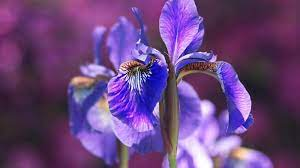

In [ ]:
from IPython.display import Image
Image(filename ="image1.png", width=500, height=350)

In [ ]:
import pandas as pd

In [ ]:
pd.value_counts(iris.species)

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [ ]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

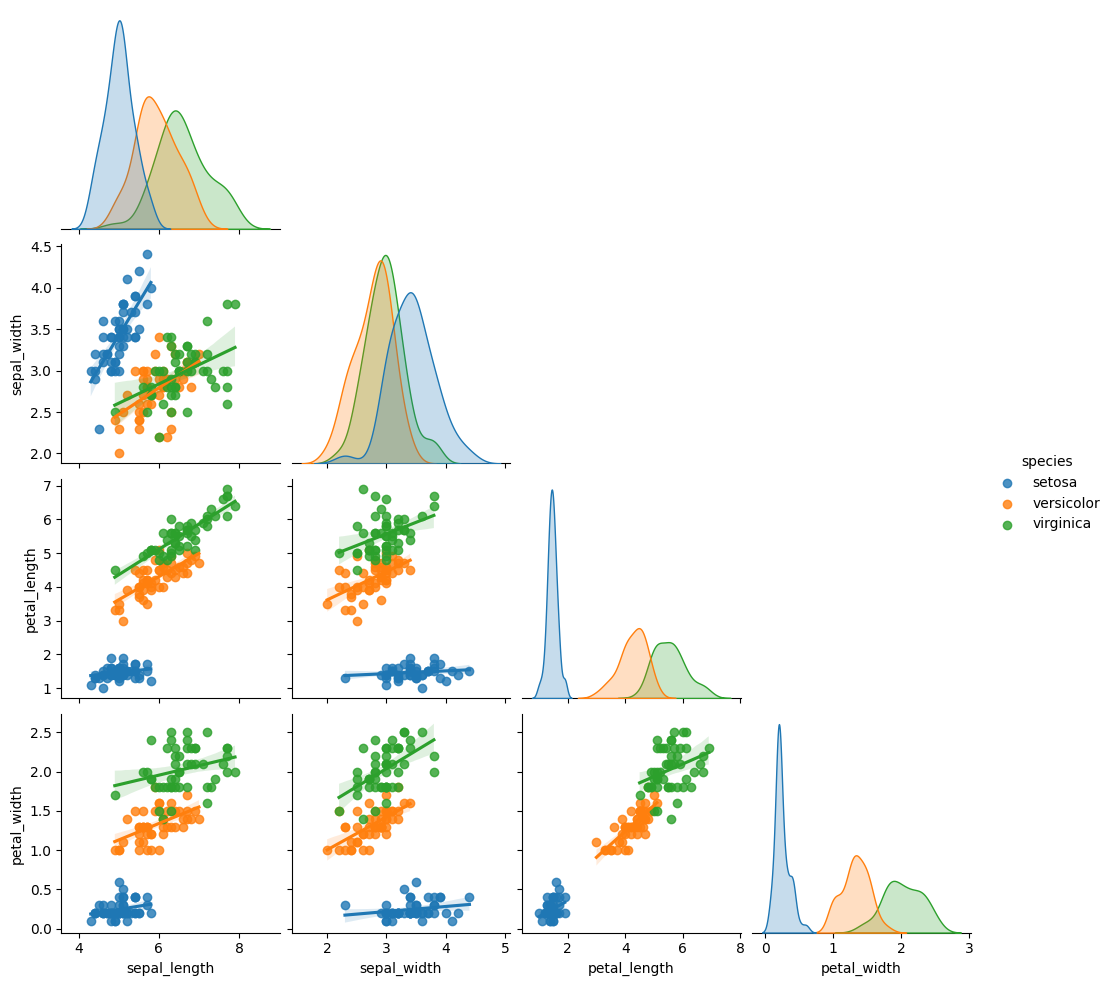

In [ ]:
sns.pairplot(iris, hue="species", corner=True, kind='reg')

In [ ]:
train = iris.sample(frac=0.7, random_state=500)

In [ ]:
test = iris.drop(train.index)

In [ ]:
X_train = train.drop(labels='species', axis=1)

In [ ]:
y_train = train.species

In [ ]:
X_test = test.drop(labels='species', axis=1)

In [ ]:
y_test = test.species

In [ ]:
print(X_train.head(),"\n", y_train.head())

     sepal_length  sepal_width  petal_length  petal_width
7             5.0          3.4           1.5          0.2
126           6.2          2.8           4.8          1.8
136           6.3          3.4           5.6          2.4
133           6.3          2.8           5.1          1.5
66            5.6          3.0           4.5          1.5 
 7          setosa
126     virginica
136     virginica
133     virginica
66     versicolor
Name: species, dtype: object


In [ ]:
X_train.shape,X_test.shape

((105, 4), (45, 4))

In [ ]:
y_train.shape,y_test.shape

((105,), (45,))

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)

In [ ]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
knn.score(X_test,y_test)

0.9555555555555556

In [ ]:
results = knn.predict(X_test)

In [ ]:
print(pd.crosstab(y_test, results, rownames=['Real'], colnames=['Predicted'], margins=True, margins_name='total'))

Predicted   setosa  versicolor  virginica  total
Real                                            
setosa          12           0          0     12
versicolor       0          20          2     22
virginica        0           0         11     11
total           12          20         13     45


In [ ]:
from sklearn import metrics

In [ ]:
print(metrics.classification_report(y_test,results,target_names=iris.species.unique(), digits=3))

              precision    recall  f1-score   support

      setosa      1.000     1.000     1.000        12
  versicolor      1.000     0.909     0.952        22
   virginica      0.846     1.000     0.917        11

    accuracy                          0.956        45
   macro avg      0.949     0.970     0.956        45
weighted avg      0.962     0.956     0.956        45



In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
var="%"
print("Accuracy: %0.1f" % (knn.score(X_test,y_test)*100), var[0])

Accuracy: 95.6 %


In [ ]:
scores = cross_val_score(knn, iris.drop('species',axis=1), iris.species, cv=5, scoring='accuracy')
scores

array([0.96666667, 0.96666667, 0.93333333, 0.96666667, 1.        ])

In [ ]:
var="%"
print("Accuracy for Cross Validation: %0.1f" % (scores.mean()*100),var[0],"(+/- %0.1f)" % (scores.std() * 100), var[0])

Accuracy for Cross Validation: 96.7 % (+/- 2.1) %


In [ ]:
k_list = list(range(1,31))

In [ ]:
k_values = dict(n_neighbors=k_list)
print(k_values.keys()),
print(k_values.values())

dict_keys(['n_neighbors'])
dict_values([[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]])


In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
grid = GridSearchCV(knn, k_values, cv=5, scoring='accuracy')

In [ ]:
grid.fit(iris.drop('species', axis=1), iris.species)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=3),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30]},
             scoring='accuracy')

In [ ]:
grid.cv_results_
grid_table = pd.DataFrame(grid.cv_results_)
grid_table.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002499,0.000616,0.003883,0.000930,1,{'n_neighbors': 1},0.966667,0.966667,0.933333,0.933333,1.0,0.960000,0.024944,19
1,0.001965,0.000076,0.002871,0.000038,2,{'n_neighbors': 2},0.966667,0.933333,0.933333,0.900000,1.0,0.946667,0.033993,26
2,0.002085,0.000175,0.003111,0.000180,3,{'n_neighbors': 3},0.966667,0.966667,0.933333,0.966667,1.0,0.966667,0.021082,10
3,0.001878,0.000026,0.002838,0.000045,4,{'n_neighbors': 4},0.966667,0.966667,0.966667,0.966667,1.0,0.973333,0.013333,6
4,0.001941,0.000114,0.002937,0.000135,5,{'n_neighbors': 5},0.966667,1.000000,0.933333,0.966667,1.0,0.973333,0.024944,6


In [ ]:
for key in grid.cv_results_.keys():
  print(key) 

mean_fit_time
std_fit_time
mean_score_time
std_score_time
param_n_neighbors
params
split0_test_score
split1_test_score
split2_test_score
split3_test_score
split4_test_score
mean_test_score
std_test_score
rank_test_score


In [ ]:
grid_table_rank = grid_table[['params','mean_test_score','std_test_score','rank_test_score']].loc[grid_table['rank_test_score']==1].sort_values(by='std_test_score', ascending=True)
grid_table_rank

,params,mean_test_score,std_test_score,rank_test_score
5,{'n_neighbors': 6},0.98,0.016330,1
6,{'n_neighbors': 7},0.98,0.016330,1
9,{'n_neighbors': 10},0.98,0.026667,1
10,{'n_neighbors': 11},0.98,0.026667,1
11,{'n_neighbors': 12},0.98,0.026667,1


In [ ]:
print("The best value of k = {} with {} of accuracy.".format(grid.best_params_,grid.best_score_))

The best value of k = {'n_neighbors': 6} with 0.9800000000000001 of accuracy.


In [ ]:
print("The best k value, rank {}, with k = {}, highest mean accuracy along with the cross validation = {} and lowest standard deviation = {}".format(grid_table.at[grid.best_index_,'rank_test_score'],grid_table.at[grid.best_index_,'params'],grid_table.at[grid.best_index_,'mean_test_score'],grid_table.at[grid.best_index_,'std_test_score']))

The best k value, rank 1, with k = {'n_neighbors': 6}, highest mean accuracy along with the cross validation = 0.9800000000000001 and lowest standard deviation = 0.016329931618554516


In [ ]:
print("The best classifier is: {}".format(grid.best_estimator_))

The best classifier is: KNeighborsClassifier(n_neighbors=6)


In [ ]:
import matplotlib.pyplot as plt

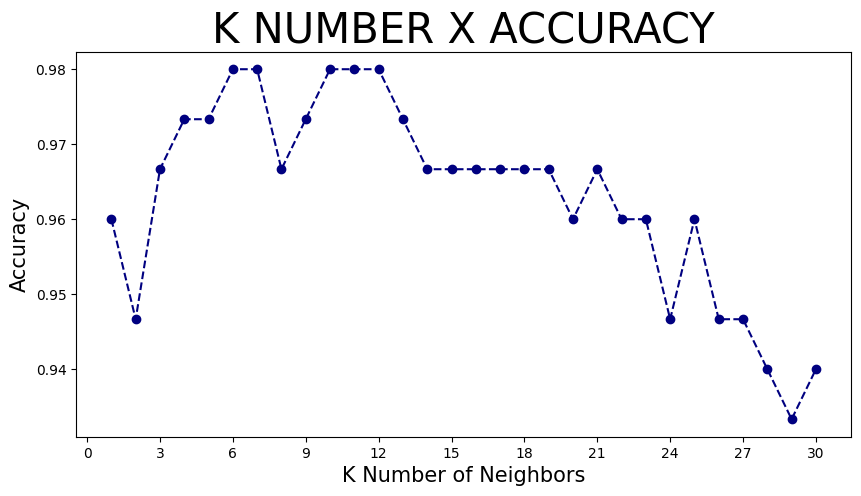

In [ ]:
graphic = grid.cv_results_['mean_test_score']
graphic

plt.figure(figsize=(10,5))
plt.plot(k_list,graphic,color='navy',linestyle='dashed',marker='o')
plt.xlabel('K Number of Neighbors', fontdict={'fontsize': 15})
plt.ylabel('Accuracy', fontdict={'fontsize': 15})
plt.title('K NUMBER X ACCURACY', fontdict={'fontsize': 30})
plt.xticks(range(0,31,3),)
#plt.xaxis.set_major_locator(MultipleLocator(3))
plt.show()